In [73]:
#librerias
from glob import glob
import nltk 
from nltk import tokenize
from nltk.corpus import stopwords

import re
import numpy as np
import pandas as pd
from time import time
from unicodedata import normalize


from nltk.corpus import stopwords
import string

In [74]:
fileRut = glob('/home/jhonex/Documentos/codigo_py_soport/nltk/clas_text/*.txt')
def organizeDoc(filelist):
    letters = []
    for file in filelist:
        #apertura de todos los documentos que concuerden con la condicion
        with open(file, 'r') as txtfile:
            letters.append((tokenize.word_tokenize(txtfile.read()), re.match('.*/(.*).*', file).group(1)))  
    letters = pd.DataFrame(letters, columns=['Text', 'Name'])
    letters = pd.DataFrame([(np.concatenate(letters[letters.Name == name].Text.values), name) 
                            for name in letters.Name.unique()], columns=['Text', 'Name'])
    filelist = letters
    return filelist
def cleanDocs(filelist):
    start = time()
    clean_letters = []
    letters = filelist
    for _, letter in letters.iterrows():
    #proceso de normalizacion
        words = [normalize('NFKD', word.lower()).encode('ascii', 'ignore').decode('utf-8')
                 for word in letter['Text']]
        # is alphabetic character, not is a stopword, not is a custom word, has at least three letters, 
        # has at least one vowel, has at least one consonant
        words = [word for word in words if word not in stopwords.words('spanish')]
        clean_letters.append(' '.join(words))
    #impresion de tiempo de ejecucion
    print('Cleaning took %.2f seconds' % (time() - start))
    clean_letters = pd.DataFrame(clean_letters)
    filelist.insert(1,'CleanText', clean_letters)
    return filelist

In [75]:
#example by
#https://likegeeks.com/nlp-tutorial-using-python-nltk/
textOrganize = organizeDoc(fileRut)
tokens = textOrganize.Text[0]
#text = str(text)
tokens = tokens.tolist()

In [76]:
freq = nltk.FreqDist(tokens)

In [77]:
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))

04:1
módulo:2
oni:1
tarde:4
como:2
destruyendo:3
entrega:2
salvo:3
caer:2
Combat:1
2589:1
apostadas:1
Dra:1
esta:1
instrucciones:1
nave:2
eligió:1
acercándose:1
eliminar:2
anciano:1
patrulla:1
estaba:1
despejar:1
activar:1
arma:1
fue:2
sacrificarse:1
masa:1
neutraliza:1
sido:2
Después:1
saltan:1
rápido:1
montan:1
volver:1
zona:1
hordas:1
noche:1
la:46
Élites:1
en:40
entrar:2
perteneces:1
dimensiones:1
áridos:1
da:3
base:5
(:11
muestra:2
diciéndoles:1
haciendo:1
demás:1
septiembre:1
suficientemente:1
avanza:1
corta:2
atacaba:1
aparece:1
gran:1
ya:6
defensivas:1
Tiempo:1
playa:1
Halo:4
repele:2
llamado:1
ha:1
dando:1
descubren:1
pero:7
destruidos:1
Desliespacio:1
MIA:1
reúne:2
UNSC:4
bajo:1
puede:3
Keyes:2
ejecutar:1
convertido:1
nativos:2
llevarla:2
espalda:1
voz:1
reunidos:1
territorios:1
comienza:2
estalla:1
regreso:1
cinemática:1
sobre:1
paso:1
manual:1
hacia:3
reconstruir:1
ese:1
zurdokc:1
vuelven:1
destrucción:1
sumiendo:1
Mientras:1
espacial:1
ninguna:1
última:1
creadora:1
prepará

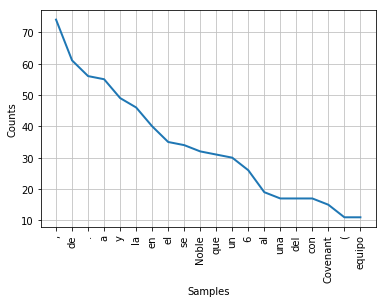

None


In [78]:
print(freq.plot(20, cumulative=False))

In [93]:
#stopwords.words('spanish')
clean_tokens = tokens[:]

In [94]:
sr = stopwords.words('spanish')
 
for token in tokens:
 
    if token in stopwords.words('spanish'):
 
        clean_tokens.remove(token)
    
# # remove punctuation from each word    
#https://machinelearningmastery.com/clean-text-machine-learning-python/
words = clean_tokens
words = [word for word in stripped if word.isalpha()]

table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in words]

In [95]:

freqe = nltk.FreqDist(stripped)
 
for key,val in freqe.items():
 
    print (str(key) + ':' + str(val))

módulo:2
oni:1
tarde:4
lugar:2
entrega:2
salvo:3
caer:2
apostadas:1
Dra:1
instrucciones:1
nave:2
acercándose:1
eliminar:2
anciano:1
patrulla:1
despejar:1
activar:1
arma:1
paso:1
masa:1
neutraliza:1
sido:2
Después:1
último:2
rápido:1
montan:1
volver:1
zona:2
hordas:1
Declarado:1
misión:1
Élites:1
entrar:2
dimensiones:1
áridos:1
controlar:1
base:5
muestra:2
diciéndoles:1
haciendo:1
demás:1
septiembre:1
suficientemente:1
avanza:1
corta:2
aparece:1
gran:1
defensivas:1
Tiempo:1
playa:1
Halo:4
repele:2
llamado:1
dando:1
descubren:1
capitán:3
destruidos:1
Desliespacio:1
MIA:1
reúne:2
UNSC:4
bajo:1
puede:3
Keyes:2
SPARTANII:1
convertido:1
nativos:2
llevarla:2
espalda:1
voz:1
reunidos:1
territorios:1
comienza:2
estalla:1
regreso:1
tuya:1
sacrificarse:1
manual:1
hacia:3
reconstruir:1
zurdokc:1
vuelven:1
destrucción:1
sumiendo:1
Mientras:1
espacial:1
ninguna:1
última:1
creadora:1
preparándose:1
élites:1
consiste:1
tan:1
idea:1
muere:2
anochecer:1
instante:1
súper:1
mal:1
Pillar:2
implacable:1
des

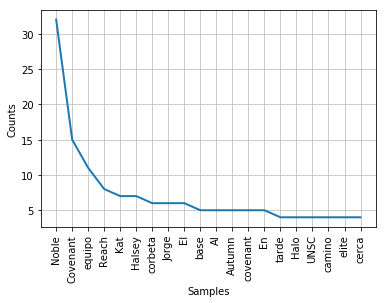

In [96]:
freqe.plot(20,cumulative=False)